In [ ]:
# configurando o Spark no Python

!ls 
!rm -rf *
#Instacao e configuracao do Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Download do Apache Spark
!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
#Descompatacao do Apache Spark
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
#Instalacao do Findspark
!pip install -q findspark

covid.json  spark-3.1.2-bin-hadoop3.2  spark-3.1.2-bin-hadoop3.2.tgz


In [ ]:
# CONFIGURANDO O AMBIENTE

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [ ]:
# CONFIGURANDO SESSÃO DO SPARK

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
# VALIDANDO CONFIGURAÇÃO DO SPARK

import pyspark
print(pyspark.__version__)

3.1.2


In [ ]:
# DOWNLOAD DOS DADOS

!curl -X GET --header 'Accept: application/json' 'https://api.covidtracking.com/v1/us/daily.json' > covid.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  248k  100  248k    0     0  4519k      0 --:--:-- --:--:-- --:--:-- 4519k


In [ ]:
# CARREGANDO DADOS NO SPARK

#Instancia o contexto do Spark
sc = spark.sparkContext
#Realiza a leitura da nossa consulta realizada na API do Covid
path = "/content/covid.json"
#Declara dataframe df com o conteudo da api que estava no JSON
df = spark.read.json(path)

In [ ]:
# EXPLORANDO DADOS

#Imprime a estrutura de dados do nosso dataframe
df.printSchema()
#Imprime uma amosta de dados ( para especificar as linhas basta colocar a quantidade entre ())
df.show(100)

root
 |-- date: long (nullable = true)
 |-- dateChecked: string (nullable = true)
 |-- death: long (nullable = true)
 |-- deathIncrease: long (nullable = true)
 |-- hash: string (nullable = true)
 |-- hospitalized: long (nullable = true)
 |-- hospitalizedCumulative: long (nullable = true)
 |-- hospitalizedCurrently: long (nullable = true)
 |-- hospitalizedIncrease: long (nullable = true)
 |-- inIcuCumulative: long (nullable = true)
 |-- inIcuCurrently: long (nullable = true)
 |-- lastModified: string (nullable = true)
 |-- negative: long (nullable = true)
 |-- negativeIncrease: long (nullable = true)
 |-- onVentilatorCumulative: long (nullable = true)
 |-- onVentilatorCurrently: long (nullable = true)
 |-- pending: long (nullable = true)
 |-- posNeg: long (nullable = true)
 |-- positive: long (nullable = true)
 |-- positiveIncrease: long (nullable = true)
 |-- recovered: string (nullable = true)
 |-- states: long (nullable = true)
 |-- total: long (nullable = true)
 |-- totalTestResult

In [ ]:
##Analise das informações e resultados obtidos

#Declara tabela temporaria no SparkSQL
df.createOrReplaceTempView("df")

In [ ]:
#Apresentando as informações
df2 = spark.sql("select * from df ")
df2.show(100)

+--------+--------------------+------+-------------+--------------------+------------+----------------------+---------------------+--------------------+---------------+--------------+--------------------+--------+----------------+----------------------+---------------------+-------+------+--------+----------------+---------+------+-----+----------------+------------------------+
|    date|         dateChecked| death|deathIncrease|                hash|hospitalized|hospitalizedCumulative|hospitalizedCurrently|hospitalizedIncrease|inIcuCumulative|inIcuCurrently|        lastModified|negative|negativeIncrease|onVentilatorCumulative|onVentilatorCurrently|pending|posNeg|positive|positiveIncrease|recovered|states|total|totalTestResults|totalTestResultsIncrease|
+--------+--------------------+------+-------------+--------------------+------------+----------------------+---------------------+--------------------+---------------+--------------+--------------------+--------+----------------+------

In [ ]:
#DATAS QUE OS AMERICANOS TIVERAM MAIS QUE 3000 MORTES

df3 = spark.sql("select date, deathIncrease from df where deathIncrease > '3000' ")
df3.show()

+--------+-------------+
|    date|deathIncrease|
+--------+-------------+
|20210225|         3138|
|20210213|         3467|
|20210212|         5427|
|20210211|         3873|
|20210210|         3445|
|20210205|         3543|
|20210204|         5212|
|20210203|         3685|
|20210202|         3486|
|20210129|         3503|
|20210128|         4011|
|20210127|         4077|
|20210126|         3734|
|20210123|         3591|
|20210122|         3980|
|20210121|         3878|
|20210120|         4409|
|20210116|         3709|
|20210115|         3679|
|20210114|         3915|
+--------+-------------+
only showing top 20 rows



In [ ]:
#SOMA DE HOSPITALIZADOS ATÉ 03/2021

df4 = spark.sql("select SUM(hospitalizedIncrease) from df where date between '20200101' and '20211231' ")
df4.show()

+-------------------------+
|sum(hospitalizedIncrease)|
+-------------------------+
|                   776361|
+-------------------------+



In [ ]:
#SOMA DE MORTES ATÉ 03/2021


df5 = spark.sql("select SUM(deathIncrease) from df where date between '20200101' and '20211231' ")
df5.show()

+------------------+
|sum(deathIncrease)|
+------------------+
|            515151|
+------------------+



In [ ]:
#UTILIZANDO O PANDAS
df2.toPandas()

,date,dateChecked,death,deathIncrease,hash,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,lastModified,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,pending,posNeg,positive,positiveIncrease,recovered,states,total,totalTestResults,totalTestResultsIncrease
0,20210307,2021-03-07T24:00:00Z,515151.0,842,a80d0063822e251249fd9a44730c49cb23defd83,776361.0,776361.0,40199.0,726,45475.0,8134.0,2021-03-07T24:00:00Z,74582825.0,131835,4281.0,2802.0,11808.0,0,28756489.0,41835,None,56,0,363825123,1170059
1,20210306,2021-03-06T24:00:00Z,514309.0,1680,dae5e558c24adb86686bbd58c08cce5f610b8bb0,775635.0,775635.0,41401.0,503,45453.0,8409.0,2021-03-06T24:00:00Z,74450990.0,143835,4280.0,2811.0,11783.0,0,28714654.0,60015,None,56,0,362655064,1430992
2,20210305,2021-03-05T24:00:00Z,512629.0,2221,724844c01659d0103801c57c0f72bf8cc8ab025c,775132.0,775132.0,42541.0,2781,45373.0,8634.0,2021-03-05T24:00:00Z,74307155.0,271917,4275.0,2889.0,12213.0,0,28654639.0,68787,None,56,0,361224072,1744417
3,20210304,2021-03-04T24:00:00Z,510408.0,1743,5c549ad30f9abf48dc5de36d20fa707014be1ff3,772351.0,772351.0,44172.0,1530,45293.0,8970.0,2021-03-04T24:00:00Z,74035238.0,177957,4267.0,2973.0,12405.0,0,28585852.0,65487,None,56,0,359479655,1590984
4,20210303,2021-03-03T24:00:00Z,508665.0,2449,fef6c425d2b773a9221fe353f13852f3e4a4bfb0,770821.0,770821.0,45462.0,2172,45214.0,9359.0,2021-03-03T24:00:00Z,73857281.0,267001,4260.0,3094.0,11778.0,0,28520365.0,66836,None,56,0,357888671,1406795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20200117,2020-01-17T24:00:00Z,NaN,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6,NaN,NaN,NaN,0,NaN,NaN,2020-01-17T24:00:00Z,NaN,0,NaN,NaN,NaN,0,0.0,0,None,1,0,0,0
416,20200116,2020-01-16T24:00:00Z,NaN,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d,NaN,NaN,NaN,0,NaN,NaN,2020-01-16T24:00:00Z,NaN,0,NaN,NaN,NaN,0,0.0,0,None,1,0,0,0
417,20200115,2020-01-15T24:00:00Z,NaN,0,8a449023413eea473277416e9e30ae126c6af047,NaN,NaN,NaN,0,NaN,NaN,2020-01-15T24:00:00Z,NaN,0,NaN,NaN,NaN,0,0.0,0,None,1,0,0,0
418,20200114,2020-01-14T24:00:00Z,NaN,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8,NaN,NaN,NaN,0,NaN,NaN,2020-01-14T24:00:00Z,NaN,0,NaN,NaN,NaN,0,0.0,0,None,1,0,0,0


In [ ]:
#PREPARANDO O AMBIENTE PARA APRESENTAÇÃO GRÁFICA
import matplotlib.pyplot as plt

Text(0, 0.5, 'QUANTIDADE')

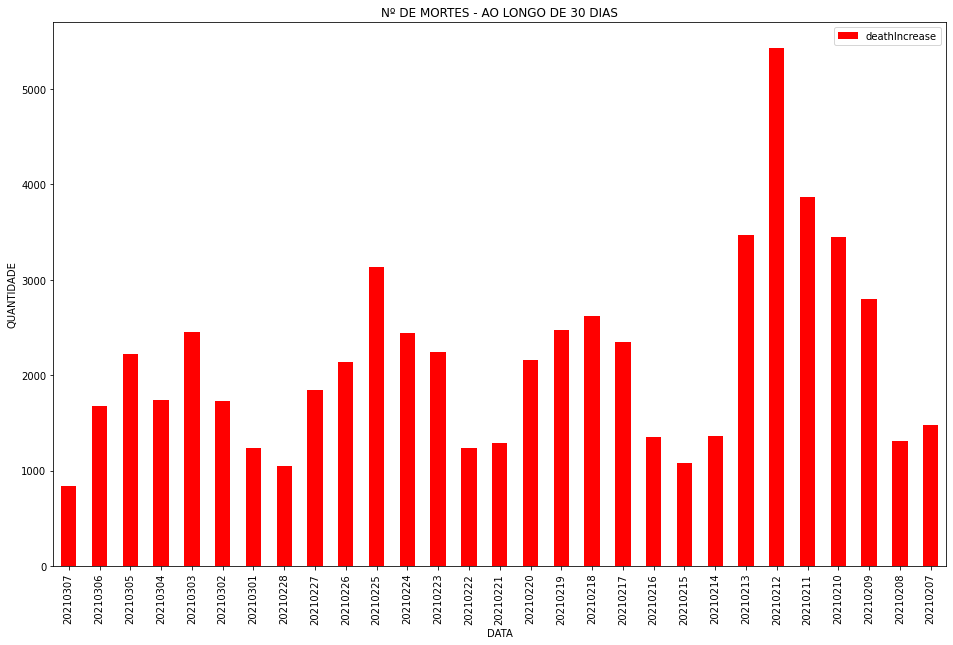

In [ ]:
#NUMERO DE MORTES AO LOGO DE 30 DIAS

pd=df2.select("date","deathIncrease").limit(29).toPandas()
%matplotlib inline
pd.plot(figsize=(16,10),kind="bar", x = "date", y="deathIncrease", color="red" )
plt.title("Nº DE MORTES - AO LONGO DE 30 DIAS")
plt.xlabel("DATA")
plt.ylabel("QUANTIDADE")

Text(0, 0.5, 'QUANTIDADE')

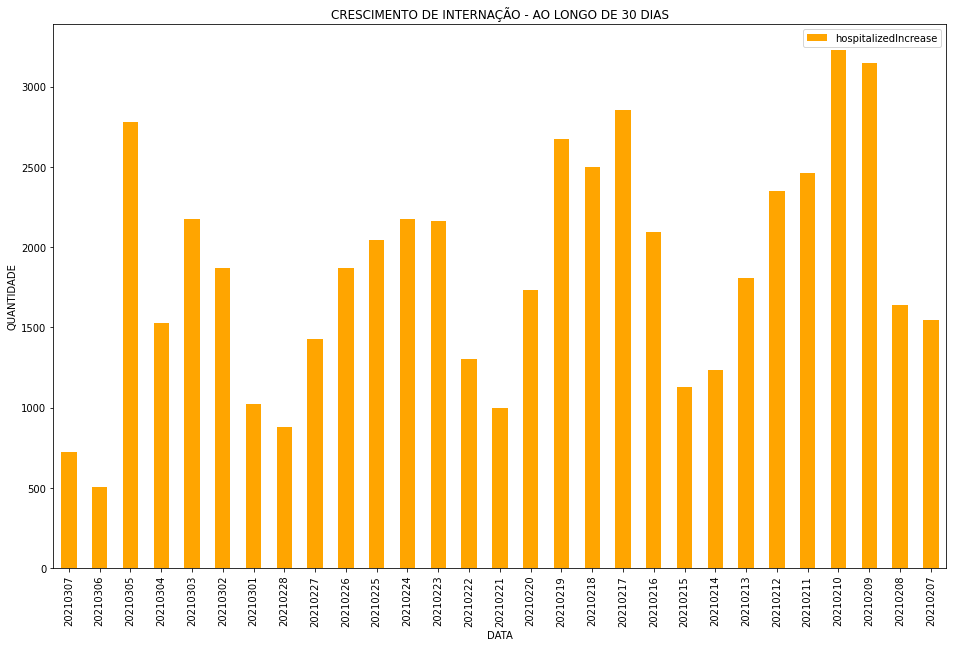

In [ ]:
#CRESCIMENTO DE INTERNAÇÃO AO LONGO DE 30 DIAS
pd2=df2.select("date","hospitalizedIncrease").limit(29).toPandas()
%matplotlib inline
pd2.plot(figsize=(16,10),kind="bar", x = "date", y="hospitalizedIncrease", color="orange" )
plt.title("CRESCIMENTO DE INTERNAÇÃO - AO LONGO DE 30 DIAS")
plt.xlabel("DATA")
plt.ylabel("QUANTIDADE")

Text(0, 0.5, 'QUANTIDADE')

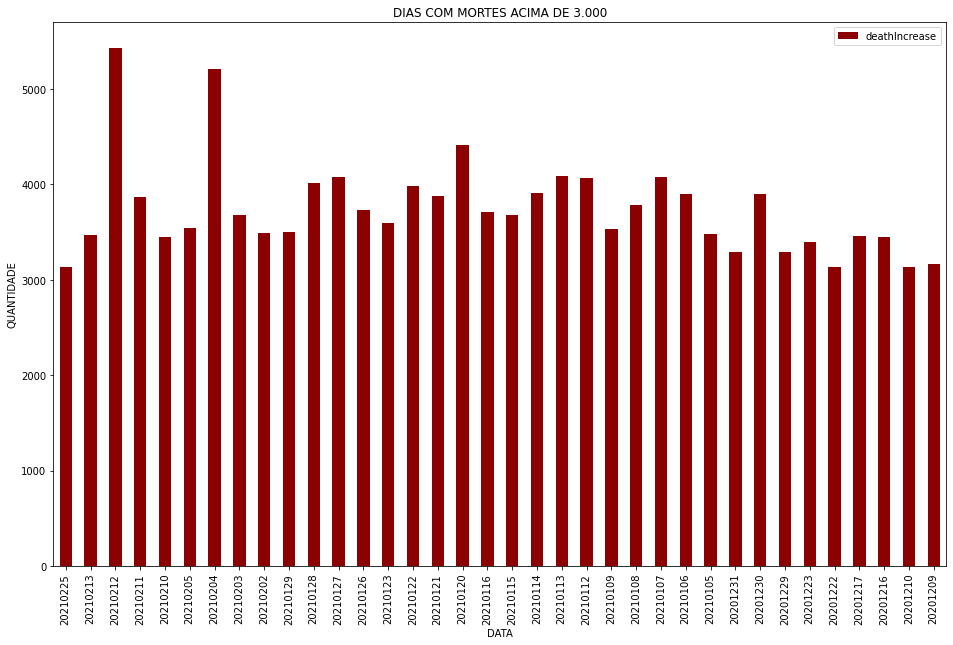

In [ ]:
#DIAS EM QUE AS MORTES ESTIVERAM ACIMA DE 3000
pd3=df3.select("date","deathIncrease").limit(100).toPandas()
%matplotlib inline
pd3.plot(figsize=(16,10), kind="bar", x = "date", y="deathIncrease", color="DarkRed" )
plt.title("DIAS COM MORTES ACIMA DE 3.000")
plt.xlabel("DATA")
plt.ylabel("QUANTIDADE")